<a href="https://colab.research.google.com/github/B2Kwame/Sentiment-Analysis-on-Amazon-Reviews.ipynb/blob/main/Sentiment_Analysis_on_Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q textblob

In [ ]:
!pip install wordcloud

In [ ]:
from textblob import TextBlob
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from wordcloud import WordCloud

In [ ]:
dataset = pd.read_csv("data.csv",encoding= 'utf-8')

In [ ]:
dataset.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""",0 0,This is a great tutu and at a really great pri...,5,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,0 0,I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,0 0,What can I say... my daughters have it in oran...,5,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,0 0,"We bought several tutus at once, and they are ...",5,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,0 0,Thank you Halo Heaven great product for Little...,5,Grammy's Angels Love it,1394841600,"03 15, 2014"


In [ ]:
#word cleaning with cleantext
!pip install clean-text[gpl]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.2 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=b19797366bc6a34eed3309ecfb9b708bbf195a2c3d829a4ad9eba057d3235dcd
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [ ]:
from cleantext import clean

In [ ]:
def cleanit(text):
  dd=clean(text,
    fix_unicode=True,               # fix various unicode errors
    to_ascii=True,                  # transliterate to closest ASCII representation
    lower=True,                     # lowercase text
    no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
    no_urls=True,                  # replace all URLs with a special token
    no_emails=True,                # replace all email addresses with a special token
    no_phone_numbers=True,         # replace all phone numbers with a special token
    no_numbers=True,               # replace all numbers with a special token
    no_digits=True,                # replace all digits with a special token
    no_currency_symbols=True,      # replace all currency symbols with a special token
    no_punct=True,                 # remove punctuations
    replace_with_number="NUMBER",
    replace_with_url="URL",
    lang="en"                       # set to 'de' for German special handling
)
  return dd

In [ ]:
dataset['clean_message']= dataset['reviewText'].apply(cleanit)

In [ ]:
dataset['clean_message'].head(5)

0    this is a great tutu and at a really great pri...
1    i bought this for my number yr old daughter fo...
2    what can i say my daughters have it in orange ...
3    we bought several tutus at once and they are g...
4    thank you halo heaven great product for little...
Name: clean_message, dtype: object

In [ ]:
#Sentiment Analysis
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment_polarity = blob.sentiment.polarity
  sentiment_subjectivity = blob.sentiment.subjectivity
  if sentiment_polarity > 0:
    sentiment_label = 'Positive'
  elif sentiment_polarity < 0:
    sentiment_label = 'Negative'
  else:
    sentiment_label = 'Neutral'
  results = {'Polarity': sentiment_polarity, 'Subjectivity': sentiment_subjectivity, 'Sentiment': sentiment_label}
  return results

In [ ]:
#Applying sentiment function on clean message
dataset['sentiment_results']=dataset['clean_message'].apply(get_sentiment)

In [ ]:
dataset['sentiment_results']

0         {'Polarity': 0.35000000000000003, 'Subjectivit...
1         {'Polarity': 0.4122222222222222, 'Subjectivity...
2         {'Polarity': 0.38083333333333336, 'Subjectivit...
3         {'Polarity': 0.010000000000000002, 'Subjectivi...
4         {'Polarity': 0.3414062500000001, 'Subjectivity...
                                ...                        
278672    {'Polarity': 0.22544642857142858, 'Subjectivit...
278673    {'Polarity': 0.28666666666666674, 'Subjectivit...
278674    {'Polarity': 0.21908994708994708, 'Subjectivit...
278675    {'Polarity': 0.23177655677655676, 'Subjectivit...
278676    {'Polarity': 0.17058767951625095, 'Subjectivit...
Name: sentiment_results, Length: 278677, dtype: object

In [ ]:
dataset=dataset.join(pd.json_normalize(dataset['sentiment_results']))

In [ ]:
dataset

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,clean_message,sentiment_results,Polarity,Subjectivity,Sentiment
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""",0 0,This is a great tutu and at a really great pri...,5,Great tutu- not cheaply made,1297468800,"02 12, 2011",this is a great tutu and at a really great pri...,"{'Polarity': 0.35000000000000003, 'Subjectivit...",0.350000,0.716667,Positive
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,0 0,I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013",i bought this for my number yr old daughter fo...,"{'Polarity': 0.4122222222222222, 'Subjectivity...",0.412222,0.584815,Positive
2,A1RLQXYNCMWRWN,0000031887,Carola,0 0,What can I say... my daughters have it in oran...,5,I have buy more than one,1357257600,"01 4, 2013",what can i say my daughters have it in orange ...,"{'Polarity': 0.38083333333333336, 'Subjectivit...",0.380833,0.590606,Positive
3,A8U3FAMSJVHS5,0000031887,Caromcg,0 0,"We bought several tutus at once, and they are ...",5,"Adorable, Sturdy",1398556800,"04 27, 2014",we bought several tutus at once and they are g...,"{'Polarity': 0.010000000000000002, 'Subjectivi...",0.010000,0.427296,Positive
4,A3GEOILWLK86XM,0000031887,CJ,0 0,Thank you Halo Heaven great product for Little...,5,Grammy's Angels Love it,1394841600,"03 15, 2014",thank you halo heaven great product for little...,"{'Polarity': 0.3414062500000001, 'Subjectivity...",0.341406,0.575000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278672,A2DG63DN704LOI,B00KKXCJQU,ESlayd,0 1,I don't normally go ga-ga over a product very ...,5,These have literally changed the way I travel!,1403568000,"06 24, 2014",i dont normally go gaga over a product very of...,"{'Polarity': 0.22544642857142858, 'Subjectivit...",0.225446,0.601786,Positive
278673,A1EVV74UQYVKRY,B00KKXCJQU,K. Groh,0 0,I've been traveling back and forth to England ...,5,Wonderful for Better Packing,1403740800,"06 26, 2014",ive been traveling back and forth to england s...,"{'Polarity': 0.28666666666666674, 'Subjectivit...",0.286667,0.516667,Positive
278674,A1UQBFCERIP7VJ,B00KKXCJQU,Margaret Picky,1 1,These are very nice packing cubes and the 18 x...,5,"Convenient, lightweight, and durable",1402185600,"06 8, 2014",these are very nice packing cubes and the numb...,"{'Polarity': 0.21908994708994708, 'Subjectivit...",0.219090,0.553968,Positive
278675,A22CW0ZHY3NJH8,B00KKXCJQU,Noname,2 2,I am on vacation with my family of four and th...,5,Holds Up Well In Real World Test,1404691200,"07 7, 2014",i am on vacation with my family of four and th...,"{'Polarity': 0.23177655677655676, 'Subjectivit...",0.231777,0.425568,Positive


In [ ]:
#Creating year and month variables
dataset['Year'] = pd.to_datetime(dataset['reviewTime']).dt.year
dataset['Month'] = pd.to_datetime(dataset['reviewTime']).dt.month
dataset['Date'] = pd.to_datetime(dataset['reviewTime'])

In [ ]:
dataset

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,clean_message,sentiment_results,Polarity,Subjectivity,Sentiment,Year,Month,Date
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""",0 0,This is a great tutu and at a really great pri...,5,Great tutu- not cheaply made,1297468800,"02 12, 2011",this is a great tutu and at a really great pri...,"{'Polarity': 0.35000000000000003, 'Subjectivit...",0.350000,0.716667,Positive,2011,2,2011-02-12
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,0 0,I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013",i bought this for my number yr old daughter fo...,"{'Polarity': 0.4122222222222222, 'Subjectivity...",0.412222,0.584815,Positive,2013,1,2013-01-19
2,A1RLQXYNCMWRWN,0000031887,Carola,0 0,What can I say... my daughters have it in oran...,5,I have buy more than one,1357257600,"01 4, 2013",what can i say my daughters have it in orange ...,"{'Polarity': 0.38083333333333336, 'Subjectivit...",0.380833,0.590606,Positive,2013,1,2013-01-04
3,A8U3FAMSJVHS5,0000031887,Caromcg,0 0,"We bought several tutus at once, and they are ...",5,"Adorable, Sturdy",1398556800,"04 27, 2014",we bought several tutus at once and they are g...,"{'Polarity': 0.010000000000000002, 'Subjectivi...",0.010000,0.427296,Positive,2014,4,2014-04-27
4,A3GEOILWLK86XM,0000031887,CJ,0 0,Thank you Halo Heaven great product for Little...,5,Grammy's Angels Love it,1394841600,"03 15, 2014",thank you halo heaven great product for little...,"{'Polarity': 0.3414062500000001, 'Subjectivity...",0.341406,0.575000,Positive,2014,3,2014-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278672,A2DG63DN704LOI,B00KKXCJQU,ESlayd,0 1,I don't normally go ga-ga over a product very ...,5,These have literally changed the way I travel!,1403568000,"06 24, 2014",i dont normally go gaga over a product very of...,"{'Polarity': 0.22544642857142858, 'Subjectivit...",0.225446,0.601786,Positive,2014,6,2014-06-24
278673,A1EVV74UQYVKRY,B00KKXCJQU,K. Groh,0 0,I've been traveling back and forth to England ...,5,Wonderful for Better Packing,1403740800,"06 26, 2014",ive been traveling back and forth to england s...,"{'Polarity': 0.28666666666666674, 'Subjectivit...",0.286667,0.516667,Positive,2014,6,2014-06-26
278674,A1UQBFCERIP7VJ,B00KKXCJQU,Margaret Picky,1 1,These are very nice packing cubes and the 18 x...,5,"Convenient, lightweight, and durable",1402185600,"06 8, 2014",these are very nice packing cubes and the numb...,"{'Polarity': 0.21908994708994708, 'Subjectivit...",0.219090,0.553968,Positive,2014,6,2014-06-08
278675,A22CW0ZHY3NJH8,B00KKXCJQU,Noname,2 2,I am on vacation with my family of four and th...,5,Holds Up Well In Real World Test,1404691200,"07 7, 2014",i am on vacation with my family of four and th...,"{'Polarity': 0.23177655677655676, 'Subjectivit...",0.231777,0.425568,Positive,2014,7,2014-07-07


In [ ]:
df = dataset[['Sentiment','Year','Month','overall']]

In [ ]:
df.groupby(['Year','Sentiment']).sum()

Month  overall
Year Sentiment                 
2003 Positive       15       10
2004 Positive       58       26
2005 Negative        9        2
     Positive      230      116
2006 Negative       61       19
     Neutral         9        2
     Positive      751      493
2007 Negative      153       82
     Neutral        88       47
     Positive     2876     1852
2008 Negative      309      168
     Neutral        66       44
     Positive     5565     3591
2009 Negative      847      375
     Neutral       140       76
     Positive    10907     6710
2010 Negative     1934      822
     Neutral       278      146
     Positive    22394    13895
2011 Negative     5386     2186
     Neutral       625      322
     Positive    68681    39444
2012 Negative    20619     7302
     Neutral      3623     1567
     Positive   254543   131231
2013 Negative    77443    32235
     Neutral     11256     6812
     Positive   838245   508091
2014 Negative    32674    26870
     Neutral      7337     6289
     Positive   326964   392196

In [ ]:
pd.crosstab(index=df['Year'], columns=df['Sentiment'])

Sentiment,Negative,Neutral,Positive
Year,,,
2003,0,0,2
2004,0,0,6
2005,1,0,26
2006,7,1,107
2007,23,11,417
2008,51,12,805
2009,115,20,1526
2010,260,37,3161
2011,736,85,9025


In [ ]:
pd.crosstab(index=df['Year'], columns=df['overall'])

overall,1,2,3,4,5
Year,,,,,
2003,0,0,0,0,2
2004,0,1,0,1,4
2005,1,2,0,7,17
2006,5,3,5,22,80
2007,11,17,42,95,286
2008,28,39,65,178,558
2009,73,81,134,341,1032
2010,134,182,325,695,2122
2011,438,536,947,2024,5901


###WordCloud

In [ ]:
dt = dataset[dataset.clean_message != 'nan']

In [ ]:
#Creating the text variable
from wordcloud import WordCloud
text1 = " ".join(title for title in dataset.clean_message)
w = WordCloud()
stop_words = list(w.stopwords)
custom_stop_words = ['u','nan','will']
stop_words = set(stop_words + custom_stop_words)

In [ ]:
# Creating word_cloud with text as argument in .generate() method

word_cloud1 = WordCloud(collocations = False, background_color = 'white', stopwords=stop_words).generate(text1)

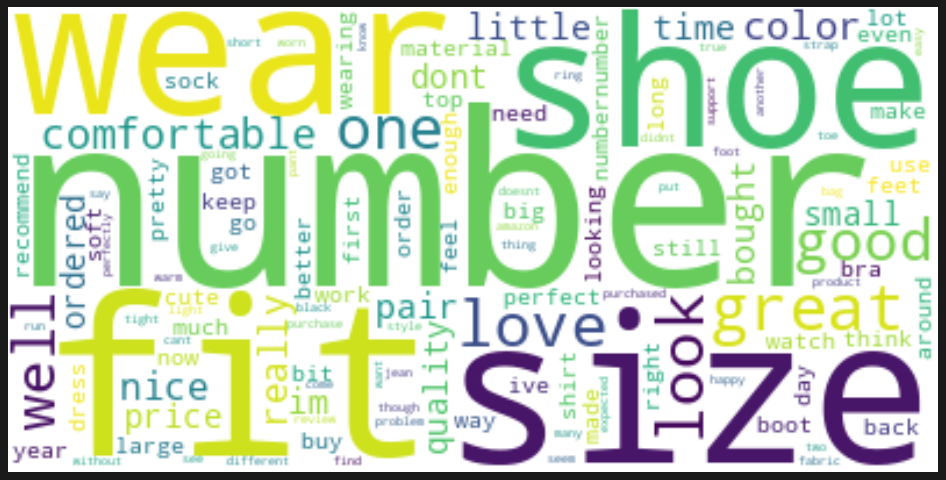

In [ ]:
plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(word_cloud1)
plt.axis("off")
plt.show()

## Positive Sentiment Wordcloud

In [ ]:
dataset_Pos=dataset[dataset['Sentiment'] == 'Positive']

In [ ]:
dataset_Pos

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,clean_message,sentiment_results,Polarity,Subjectivity,Sentiment,Year,Month,Date
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""",0 0,This is a great tutu and at a really great pri...,5,Great tutu- not cheaply made,1297468800,"02 12, 2011",this is a great tutu and at a really great pri...,"{'Polarity': 0.35000000000000003, 'Subjectivit...",0.350000,0.716667,Positive,2011,2,2011-02-12
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,0 0,I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013",i bought this for my number yr old daughter fo...,"{'Polarity': 0.4122222222222222, 'Subjectivity...",0.412222,0.584815,Positive,2013,1,2013-01-19
2,A1RLQXYNCMWRWN,0000031887,Carola,0 0,What can I say... my daughters have it in oran...,5,I have buy more than one,1357257600,"01 4, 2013",what can i say my daughters have it in orange ...,"{'Polarity': 0.38083333333333336, 'Subjectivit...",0.380833,0.590606,Positive,2013,1,2013-01-04
3,A8U3FAMSJVHS5,0000031887,Caromcg,0 0,"We bought several tutus at once, and they are ...",5,"Adorable, Sturdy",1398556800,"04 27, 2014",we bought several tutus at once and they are g...,"{'Polarity': 0.010000000000000002, 'Subjectivi...",0.010000,0.427296,Positive,2014,4,2014-04-27
4,A3GEOILWLK86XM,0000031887,CJ,0 0,Thank you Halo Heaven great product for Little...,5,Grammy's Angels Love it,1394841600,"03 15, 2014",thank you halo heaven great product for little...,"{'Polarity': 0.3414062500000001, 'Subjectivity...",0.341406,0.575000,Positive,2014,3,2014-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278672,A2DG63DN704LOI,B00KKXCJQU,ESlayd,0 1,I don't normally go ga-ga over a product very ...,5,These have literally changed the way I travel!,1403568000,"06 24, 2014",i dont normally go gaga over a product very of...,"{'Polarity': 0.22544642857142858, 'Subjectivit...",0.225446,0.601786,Positive,2014,6,2014-06-24
278673,A1EVV74UQYVKRY,B00KKXCJQU,K. Groh,0 0,I've been traveling back and forth to England ...,5,Wonderful for Better Packing,1403740800,"06 26, 2014",ive been traveling back and forth to england s...,"{'Polarity': 0.28666666666666674, 'Subjectivit...",0.286667,0.516667,Positive,2014,6,2014-06-26
278674,A1UQBFCERIP7VJ,B00KKXCJQU,Margaret Picky,1 1,These are very nice packing cubes and the 18 x...,5,"Convenient, lightweight, and durable",1402185600,"06 8, 2014",these are very nice packing cubes and the numb...,"{'Polarity': 0.21908994708994708, 'Subjectivit...",0.219090,0.553968,Positive,2014,6,2014-06-08
278675,A22CW0ZHY3NJH8,B00KKXCJQU,Noname,2 2,I am on vacation with my family of four and th...,5,Holds Up Well In Real World Test,1404691200,"07 7, 2014",i am on vacation with my family of four and th...,"{'Polarity': 0.23177655677655676, 'Subjectivit...",0.231777,0.425568,Positive,2014,7,2014-07-07


In [ ]:
dt_Pos = dataset_Pos[dataset_Pos.clean_message != 'nan']

In [ ]:
#Creating the text variable
from wordcloud import WordCloud
text2 = " ".join(title for title in dt_Pos.clean_message)
wi = WordCloud()
stop_wordss = list(wi.stopwords)
custom_stop_wordss = ['u','nan','will']
stop_wordss = set(stop_wordss + custom_stop_wordss)

In [ ]:
# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white', stopwords=stop_wordss).generate(text2)

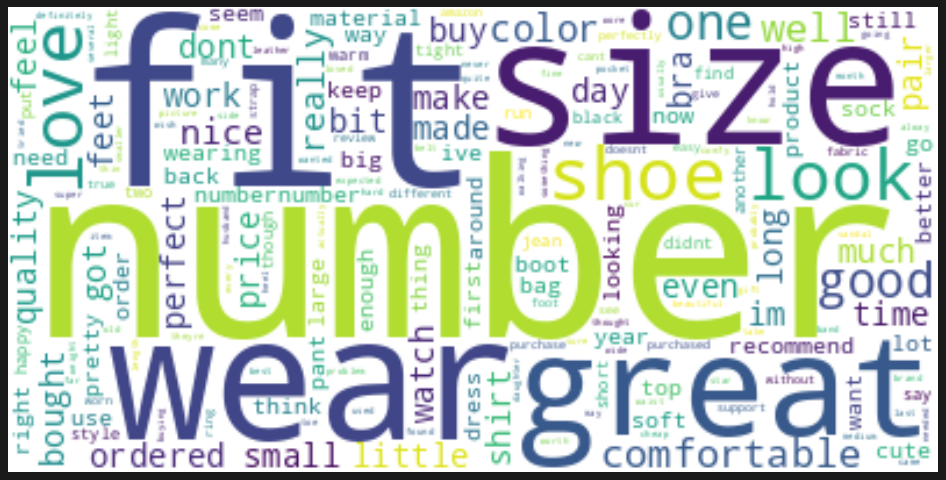

In [ ]:
plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(word_cloud2)
plt.axis("off")
plt.show()

##Negative Sentiment Wordcloud

In [ ]:
dataset_Neg=dataset[dataset['Sentiment'] == 'Negative']

In [ ]:
dataset_Neg

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,clean_message,sentiment_results,Polarity,Subjectivity,Sentiment,Year,Month,Date
5,A27UF1MSF3DB2,0000031887,"C-Lo ""Cynthia""",0 0,I received this today and I'm not a fan of it ...,4,It's ok,1396224000,"03 31, 2014",i received this today and im not a fan of it b...,"{'Polarity': -0.10833333333333334, 'Subjectivi...",-0.108333,0.325000,Negative,2014,3,2014-03-31
27,A1JC50F14SLAEV,0123456479,Mada,0 0,I wanted to have the title summarize my though...,3,Nice Size But Drawers Are A Concern,1399852800,"05 12, 2014",i wanted to have the title summarize my though...,"{'Polarity': -0.02812500000000001, 'Subjectivi...",-0.028125,0.553125,Negative,2014,5,2014-05-12
33,A28QH3KX709FFQ,1608299953,"Don Quixote ""Don Q""",24 31,I bought this product a little over a year ago...,1,DO NOT BUY IF YOU EVER WANT TO RESELL IT.,1348185600,"09 21, 2012",i bought this product a little over a year ago...,"{'Polarity': -0.32916666666666666, 'Subjectivi...",-0.329167,0.600000,Negative,2012,9,2012-09-21
58,A1059SSXUZZS1S,B00001W0KA,Cassie,0 0,We got this costume for my son to wear to Disn...,4,"Great Costume, Awkward To Put On",1383696000,"11 6, 2013",we got this costume for my son to wear to disn...,"{'Polarity': -0.065625, 'Subjectivity': 0.5276...",-0.065625,0.527604,Negative,2013,11,2013-11-06
70,A3VZ1PO40JCGFV,B00001WRHJ,Tina Smith,0 2,Have they lost their minds??!! Over 100$ for a...,1,WHAT!?,1379548800,"09 19, 2013",have they lost their minds over number<cur> fo...,"{'Polarity': -0.15000000000000002, 'Subjectivi...",-0.150000,0.650000,Negative,2013,9,2013-09-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278620,A1VW4D5B59VZQW,B00K551QR6,irishwil,8 8,"I REALLY HATE TO GIVE A NEGATIVE RATING, BUT I...",2,NOT MID LENGTH.......WAY TOO SHORT AND TOO SMALL,1403654400,"06 25, 2014",i really hate to give a negative rating but i ...,"{'Polarity': -0.038888888888888896, 'Subjectiv...",-0.038889,0.418254,Negative,2014,6,2014-06-25
278643,A2QUKZDB80K26B,B00KA602SY,Cindyy,0 0,idk why this shirt didnt fit i mean i ordered ...,2,mehh,1404172800,"07 1, 2014",idk why this shirt didnt fit i mean i ordered ...,"{'Polarity': -0.02321428571428571, 'Subjectivi...",-0.023214,0.496786,Negative,2014,7,2014-07-01
278645,AXFRZ0CBT8LXJ,B00KA602SY,Kimmy,0 0,The shirt fits like a belly shirt...way too sm...,1,The shirt fits like a belly shirt,1404518400,"07 5, 2014",the shirt fits like a belly shirtway too small...,"{'Polarity': -0.09, 'Subjectivity': 0.11000000...",-0.090000,0.110000,Negative,2014,7,2014-07-05
278652,AG5N21TGDQWRJ,B00KCWMG5S,Lori Mohler,0 0,Trying to decide if return or just give away t...,2,just too small,1401926400,"06 5, 2014",trying to decide if return or just give away t...,"{'Polarity': -0.8, 'Subjectivity': 0.9, 'Senti...",-0.800000,0.900000,Negative,2014,6,2014-06-05


In [ ]:
dt_Neg = dataset_Neg[dataset_Neg.clean_message != 'nan']

In [ ]:
#Creating the text variable
from wordcloud import WordCloud
text3 = " ".join(title for title in dt_Neg.clean_message)
wv = WordCloud()
stop_wordsss = list(wv.stopwords)
custom_stop_wordsss = ['u','nan','will']
stop_wordsss = set(stop_wordsss + custom_stop_wordsss)

In [ ]:
# Creating word_cloud with text as argument in .generate() method

word_cloud3 = WordCloud(collocations = False, background_color = 'white', stopwords=stop_wordsss).generate(text3)

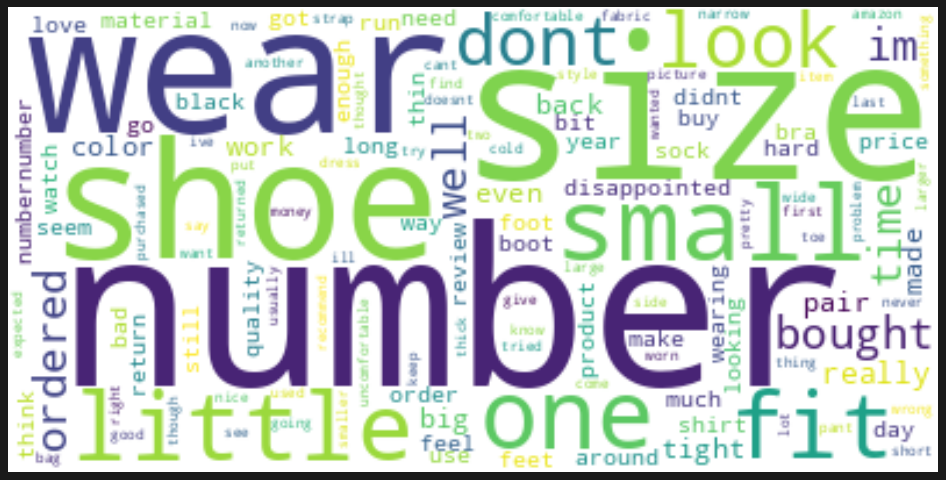

In [ ]:
plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(word_cloud3)
plt.axis("off")
plt.show()

#Plot of Word Frequency on Amazon Reviews

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
dataset.clean_message

0         this is a great tutu and at a really great pri...
1         i bought this for my number yr old daughter fo...
2         what can i say my daughters have it in orange ...
3         we bought several tutus at once and they are g...
4         thank you halo heaven great product for little...
                                ...                        
278672    i dont normally go gaga over a product very of...
278673    ive been traveling back and forth to england s...
278674    these are very nice packing cubes and the numb...
278675    i am on vacation with my family of four and th...
278676    when i signed up to receive a free set of shac...
Name: clean_message, Length: 278677, dtype: object

In [ ]:
sentence =" ".join(dataset["clean_message"])
word = word_tokenize(sentence)

In [ ]:
def word_frequency(new_tokens):
    #new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words("english")]
    #new_tokens = [t for t in new_tokens if t.isalpha()]
    #lemmatizer = WordNetLemmatizer()
    #new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [ ]:
#lower=word_frequency(word)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#example_sent = """This is a sample sentence,
                  #showing off the stop words filtration."""

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(sentence)
# converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion
filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [ ]:
bow=Counter(filtered_sentence)

In [ ]:
dataAmazonReviews = pd.DataFrame(bow.items(),columns=["word","frequency"]).sort_values(by="frequency",ascending=False)

In [ ]:
dataAmazonReviews.drop(dataAmazonReviews[(dataAmazonReviews['word'] == "u")].index, inplace=True)

In [ ]:
dataAmazonReviews.drop(dataAmazonReviews[(dataAmazonReviews['word'] == "nan")].index, inplace=True)

In [ ]:
dataAmazonReviews.drop(dataAmazonReviews[(dataAmazonReviews['word'] == "url")].index, inplace=True)

In [ ]:
dataAmazonReviews.head(50)

,word,frequency
18,number,127718
246,like,90011
203,size,84946
205,fit,79897
63,wear,79608
0,great,77809
128,would,62351
40,good,60048
67,love,59869
83,well,58297


<Axes: xlabel='frequency', ylabel='word'>

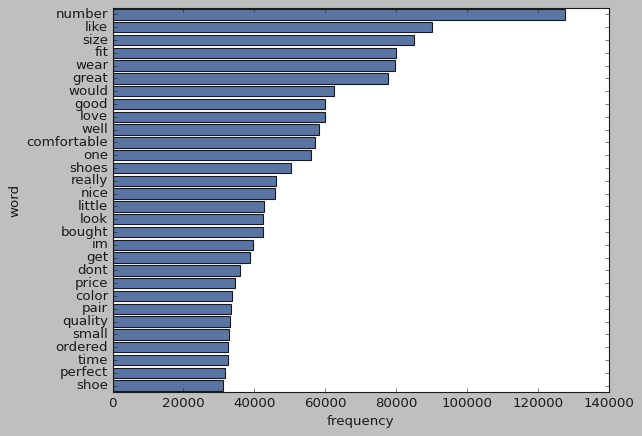

In [ ]:
sns.barplot(x='frequency',y='word',data=dataAmazonReviews.head(30))

#Plot of Word Frequency on Amazon reviews on Positive Words


In [ ]:
dataset_Pos.clean_message

0         this is a great tutu and at a really great pri...
1         i bought this for my number yr old daughter fo...
2         what can i say my daughters have it in orange ...
3         we bought several tutus at once and they are g...
4         thank you halo heaven great product for little...
                                ...                        
278672    i dont normally go gaga over a product very of...
278673    ive been traveling back and forth to england s...
278674    these are very nice packing cubes and the numb...
278675    i am on vacation with my family of four and th...
278676    when i signed up to receive a free set of shac...
Name: clean_message, Length: 251667, dtype: object

In [ ]:
sentenc =" ".join(dataset_Pos["clean_message"])
words = word_tokenize(sentenc)

In [ ]:
stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(sentenc)
# converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion
filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [ ]:
boww=Counter(filtered_sentence)

In [ ]:
dataPos = pd.DataFrame(boww.items(),columns=["word","frequency"]).sort_values(by="frequency",ascending=False)

In [ ]:
dataPos.head(50)

,word,frequency
18,number,117021
226,like,81540
181,size,77290
183,fit,77143
0,great,77055
63,wear,73112
67,love,58905
40,good,58793
152,would,57034
60,comfortable,55814


<Axes: xlabel='frequency', ylabel='word'>

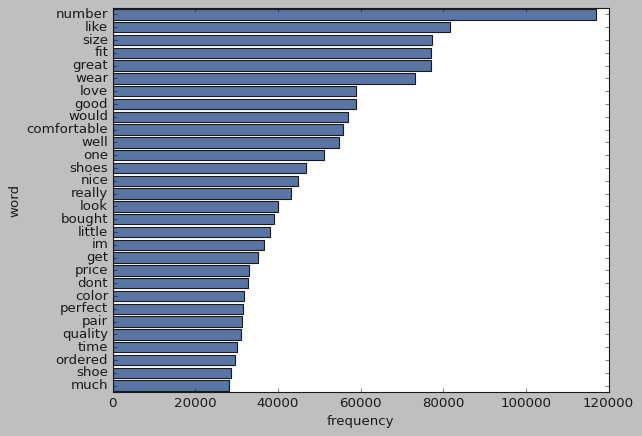

In [ ]:
sns.barplot(x='frequency',y='word',data=dataPos.head(30))

#Plot of Word Frequency on Amazon reviews on Negative Words


In [ ]:
dataset_Neg.clean_message

5         i received this today and im not a fan of it b...
27        i wanted to have the title summarize my though...
33        i bought this product a little over a year ago...
58        we got this costume for my son to wear to disn...
70        have they lost their minds over number<cur> fo...
                                ...                        
278620    i really hate to give a negative rating but i ...
278643    idk why this shirt didnt fit i mean i ordered ...
278645    the shirt fits like a belly shirtway too small...
278652    trying to decide if return or just give away t...
278655    if you are an outdoor person and are outdoors ...
Name: clean_message, Length: 23053, dtype: object

In [ ]:
sentenc1 =" ".join(dataset_Neg["clean_message"])
words = word_tokenize(sentenc)

In [ ]:
stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(sentenc1)
# converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion
filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [ ]:
bowww=Counter(filtered_sentence)

In [ ]:
dataNeg = pd.DataFrame(bowww.items(),columns=["word","frequency"]).sort_values(by="frequency",ascending=False)

In [ ]:
dataNeg.head(50)

,word,frequency
176,number,9916
114,like,7621
392,size,7255
23,wear,6003
123,small,5690
6,would,4923
84,little,4593
10,one,4337
404,shoes,3323
145,get,3225


<Axes: xlabel='frequency', ylabel='word'>

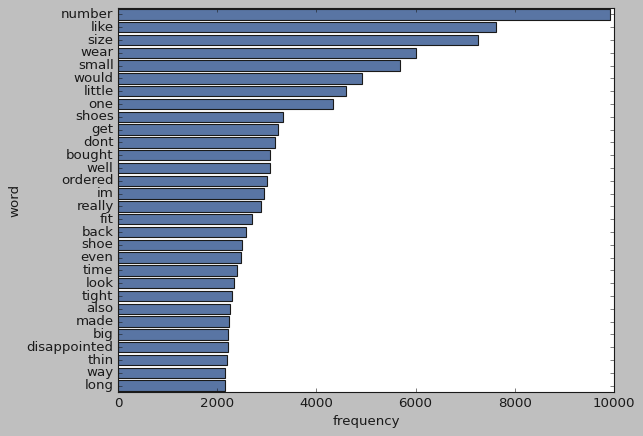

In [ ]:
sns.barplot(x='frequency',y='word',data=dataNeg.head(30))